In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import netCDF4 as nc
from netCDF4 import Dataset
import geopandas as gpd
import pandas as pd
import seaborn as sns
import random
import xarray as xr

In [2]:
#Load the df
total_df = pd.read_parquet('/cluster/home/maikents/features_midnor_2019/ready_for_training/total_df.parquet')

In [3]:
total_df_no_xy = total_df.drop(columns=['x', 'y'])

In [5]:
total_df_no_xy = total_df_no_xy.drop(columns=['stat'])

In [6]:
print(total_df_no_xy.columns)

Index(['bottom_temperature_sundahl_features', 'bottom_salinity_features',
       'bottom_current_features', 'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle',
       'bottom_temperature_sundahl_features_mean',
       'bottom_salinity_features_mean', 'bottom_current_features_mean',
       'bottom_temperature_sundahl_features_10th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_temperature_sundahl_features_90th_percentile',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_90th_percentile', 'aspect_cos', 'aspect_sin',
       'bathymetry', 'broad_BPI', 'fine_BPI', 'log_ruggedness', 'slope'],
      dtype='object')


In [7]:
total_df_no_xy = total_df_no_xy.drop(columns=['bottom_temperature_sundahl_features', 'bottom_salinity_features', 'bottom_current_features'])

In [8]:
#Change the order for a nicer correlation matrix
new_order = ['bottom_temperature_sundahl_features_10th_percentile', 'bottom_temperature_sundahl_features_mean', 'bottom_temperature_sundahl_features_90th_percentile',
            'bottom_salinity_features_10th_percentile', 'bottom_salinity_features_mean', 'bottom_salinity_features_90th_percentile',
            'bottom_current_features_mean', 'bottom_current_features_90th_percentile',
            'bottom_statistical_northness_features', 'bottom_statistical_eastness_features', 'current_aspect_angle',
            'aspect_cos', 'aspect_sin', 'bathymetry', 'broad_BPI', 'fine_BPI', 'log_ruggedness', 'slope']
total_df_no_xy = total_df_no_xy.loc[:, new_order]

In [9]:
print(total_df_no_xy.columns)

Index(['bottom_temperature_sundahl_features_10th_percentile',
       'bottom_temperature_sundahl_features_mean',
       'bottom_temperature_sundahl_features_90th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_salinity_features_mean',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_mean',
       'bottom_current_features_90th_percentile',
       'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle',
       'aspect_cos', 'aspect_sin', 'bathymetry', 'broad_BPI', 'fine_BPI',
       'log_ruggedness', 'slope'],
      dtype='object')


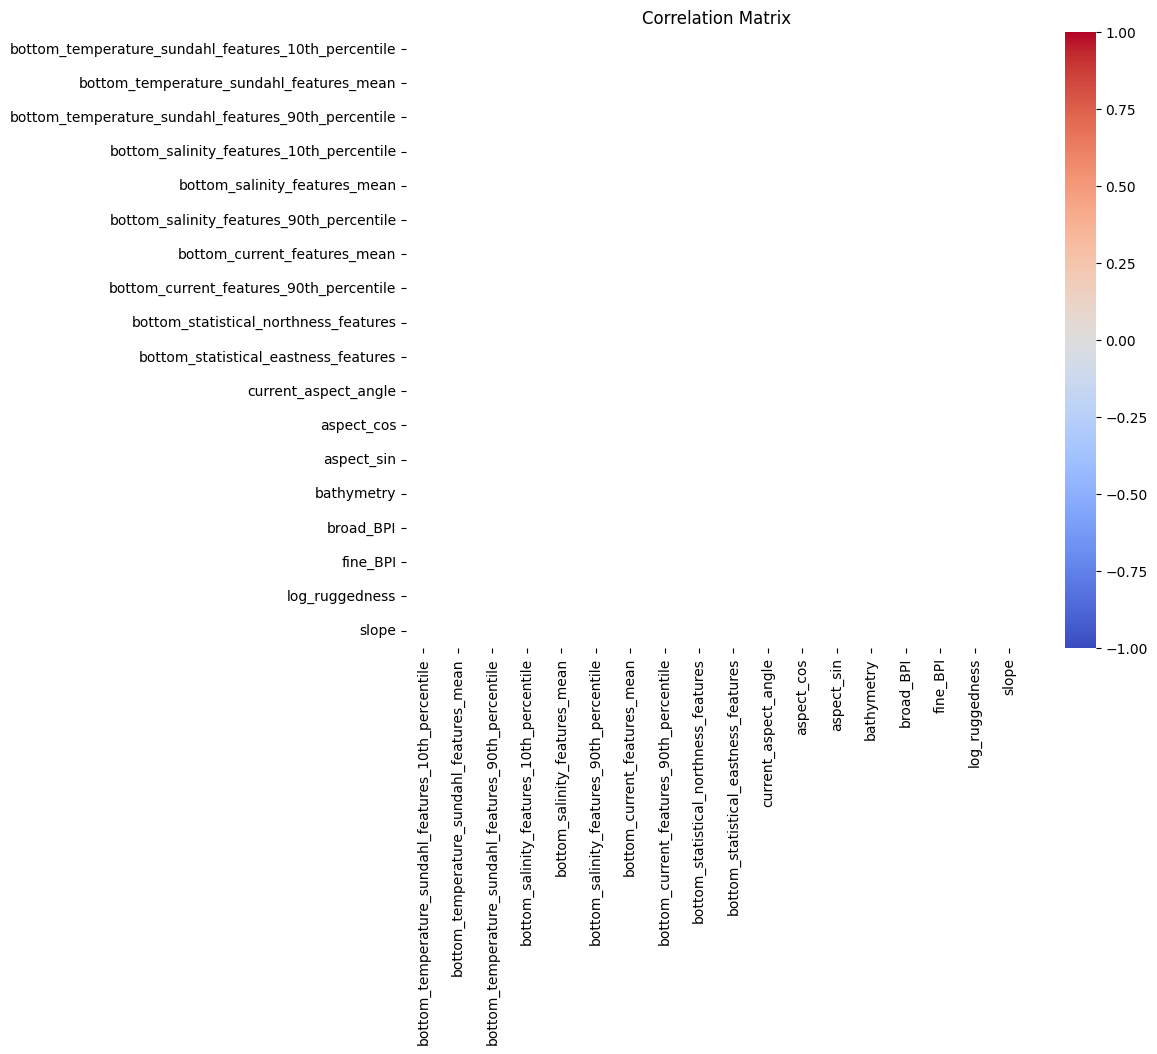

In [10]:
#Creating the correlation matrix for all locations

correlation_matrix = total_df_no_xy.corr()

ordered_corr = correlation_matrix.loc[total_df_no_xy.columns, total_df_no_xy.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(ordered_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()